In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime


df = pd.concat([pd.read_csv(d, dtype=str) for d in os.listdir('.') if '.csv' in d])

print(df.columns)

count_cols = [col for col in df.columns if ":" in col]

df[count_cols] = df[count_cols].apply(pd.to_numeric) 

df.drop(columns='GIS ID', inplace=True)
df.dropna(inplace=True)

In [ ]:
counts_df = df[count_cols]
counts_df = counts_df.apply(pd.to_numeric)
counts_df.dropna(inplace=True)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

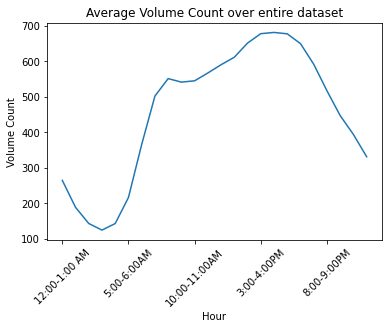

In [ ]:
counts_df.mean().plot()
plt.ylabel('Volume Count')
plt.xlabel('Hour')
plt.title('Average Volume Count over entire dataset')
plt.xticks(rotation=45)

In [ ]:
print(f'Number of unique segments: {df["Segment ID"].nunique()}')

df['Segment ID'].value_counts()

Number of unique segments: 1774


107111    70
77424     70
91529     70
77328     70
72026     70
          ..
120740     8
71591      8
71729      8
43527      7
202        1
Name: Segment ID, Length: 1774, dtype: int64

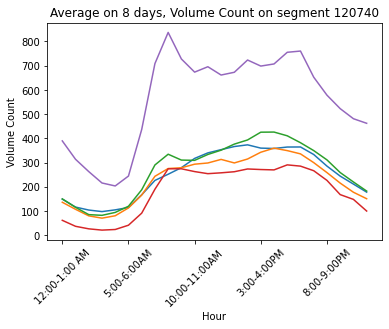

In [ ]:
def plot_volume_of_segment(segment_id):
  temp_df = df[df['Segment ID'] == segment_id]
  temp_df = temp_df[count_cols]
  temp_df.mean().plot()
  plt.ylabel('Volume Count')
  plt.xlabel('Hour')
  plt.title(f'Average on {len(temp_df)} days, Volume Count on segment {segment_id}')
  plt.xticks(rotation=45)

plot_volume_of_segment('72026')
plot_volume_of_segment('107111')
plot_volume_of_segment('77424')
plot_volume_of_segment('91529')

plot_volume_of_segment('120740')

In [ ]:
from sklearn.cluster import KMeans

X = df[count_cols].to_numpy()

# TODO: understand if there are "families" of segments and how many?

In [ ]:
# TODO: Learn about ARIMA algorithm.

# Try working with bigger dataset of automatic measurements

https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt

In [ ]:
import pandas as pd

# results_df = pd.read_csv('seg115270.csv')
results_df = pd.read_csv('seg34338.csv')
results_df['new_date'] = pd.to_datetime(dict(year=results_df.Yr, month=results_df.M, day=results_df.D, hour=results_df.HH, minutes=results_df.MM))
results_df['Vol'] = pd.to_numeric(results_df['Vol'])

results_df.sort_values(by='new_date', ascending=False)

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction,new_date
33099,32384,Manhattan,2020,11,1,23,45,79,34338,POINT (987878.1663718851 220314.35523341902),AMSTERDAM AVENUE,West 60 Street,West 61 Street,NB,2020-11-01 23:45:00
17041,32384,Manhattan,2020,11,1,23,30,75,34338,POINT (987878.1663718851 220314.35523341902),AMSTERDAM AVENUE,West 60 Street,West 61 Street,NB,2020-11-01 23:30:00
1545,32384,Manhattan,2020,11,1,23,15,90,34338,POINT (987878.1663718851 220314.35523341902),AMSTERDAM AVENUE,West 60 Street,West 61 Street,NB,2020-11-01 23:15:00
18195,32384,Manhattan,2020,11,1,23,0,88,34338,POINT (987878.1663718851 220314.35523341902),AMSTERDAM AVENUE,West 60 Street,West 61 Street,NB,2020-11-01 23:00:00
28748,32384,Manhattan,2020,11,1,22,45,88,34338,POINT (987878.1663718851 220314.35523341902),AMSTERDAM AVENUE,West 60 Street,West 61 Street,NB,2020-11-01 22:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225,3074,Manhattan,2009,10,18,13,0,1342,34338,POINT (987872.8 220304.7),N/B AMSTERDAM AVE @ W 61 ST,W 60 ST,W 61 ST,NB,2009-10-18 13:00:00
4340,3074,Manhattan,2009,10,18,12,0,1231,34338,POINT (987872.8 220304.7),N/B AMSTERDAM AVE @ W 61 ST,W 60 ST,W 61 ST,NB,2009-10-18 12:00:00
20766,3074,Manhattan,2009,10,18,11,0,1080,34338,POINT (987872.8 220304.7),N/B AMSTERDAM AVE @ W 61 ST,W 60 ST,W 61 ST,NB,2009-10-18 11:00:00
34676,3074,Manhattan,2009,10,18,10,0,945,34338,POINT (987872.8 220304.7),N/B AMSTERDAM AVE @ W 61 ST,W 60 ST,W 61 ST,NB,2009-10-18 10:00:00


### Chrcking that all measurements are perfromed on the same load lane.

In [ ]:
print(f'To street: {results_df.toSt.unique()}')
print(f'From street street: {results_df.fromSt.unique()}')

To street: ['West 61 Street' 'W 61 ST']
From street street: ['West 60 Street' 'W 60 ST']


Text(0.5, 1.0, 'Number of measurements for each hour')

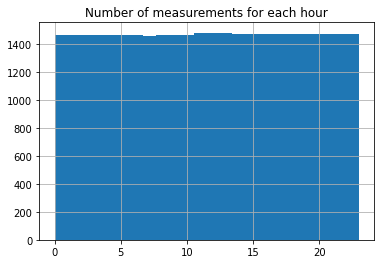

In [ ]:
import matplotlib.pyplot as plt
results_df['HH'].hist(bins=24)
plt.title('Number of measurements for each hour')

# Check if the data is continuous.
Our goal is to find multiple sequences of traffic volume measurements, and connect them thogether into single time series.

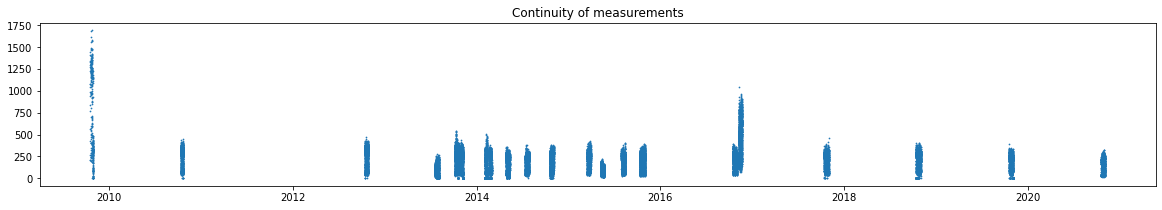

In [ ]:
import matplotlib.pyplot as plt

def plot_continuity(df):
  plt.figure(figsize=(20,3))
  plt.title('Continuity of measurements')
  plt.scatter(df['new_date'], df['Vol'], s=0.5)

plot_continuity(results_df)

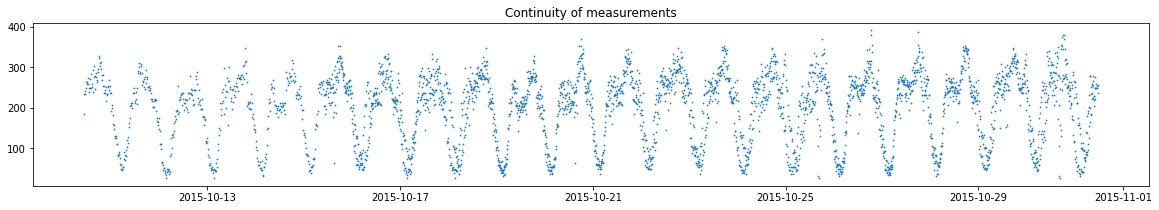

In [ ]:
import datetime

# temp_df = results_df[(results_df['new_date'] > datetime.datetime(2015,10,1)) & (results_df['new_date'] < datetime.datetime(2016,1,1))]
# temp_df = results_df[(results_df['new_date'] > datetime.datetime(2013,10,1)) & (results_df['new_date'] < datetime.datetime(2014,1,1))]
# temp_df = results_df[(results_df['new_date'] > datetime.datetime(2020,10,1)) & (results_df['new_date'] < datetime.datetime(2022,1,1))]

temp_df = results_df[(results_df['new_date'] > datetime.datetime(2015,10,1)) & (results_df['new_date'] < datetime.datetime(2016,1,1))]
temp_df = temp_df.sort_values('new_date')
plot_continuity(temp_df)

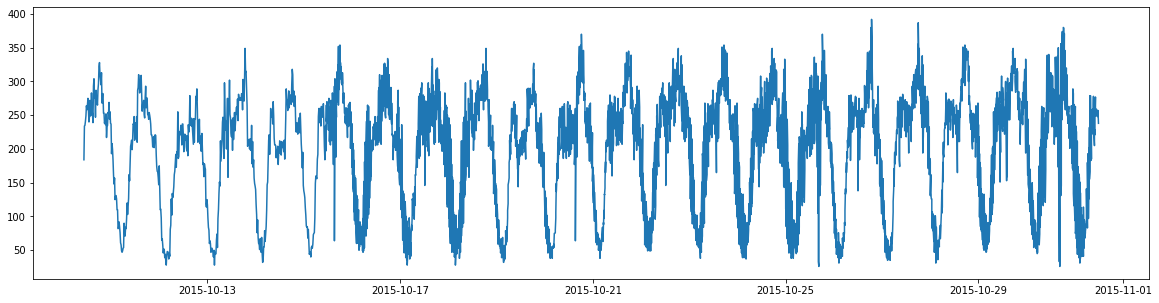

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(temp_df['new_date'], temp_df['Vol'])

### Autocorrelation plot 

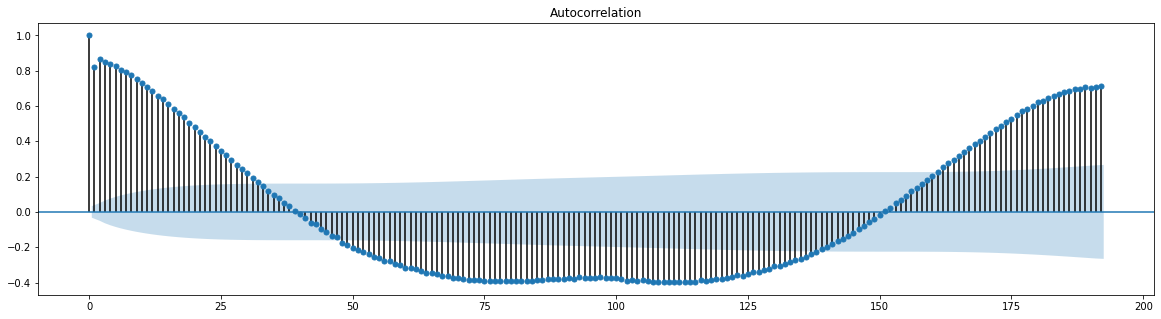

In [ ]:
from pandas import read_csv
import matplotlib
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

with matplotlib.rc_context():
  matplotlib.rc("figure", figsize=(20,5))
  plot_acf(temp_df['Vol'], lags=192)

pyplot.show()

### AR model

In [ ]:
!pip install statsmodels
!pip install statsmodels --upgrade
!pip install statsmodels==0.11.0

     |████████████████████████████████| 9.8 MB 3.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 8.7 MB 4.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


Split the data to a train and test data

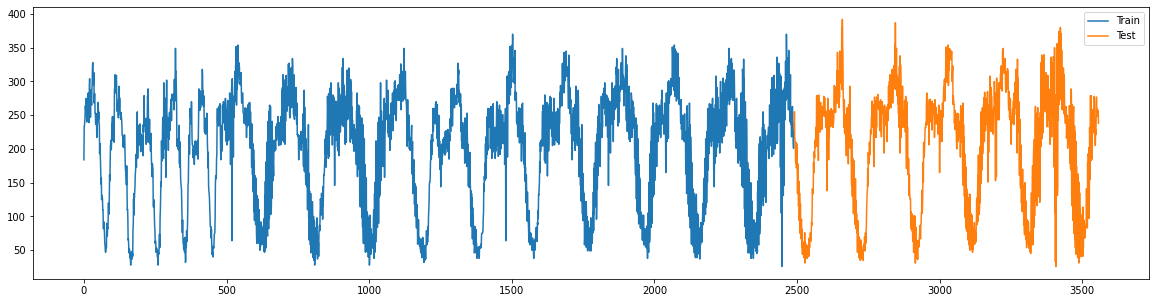

In [ ]:
import matplotlib.pyplot as plt

X = temp_df['Vol'].values

TRAIN_PORTION = 0.7

train_size = int(TRAIN_PORTION*len(X))
test_size = len(X) - train_size

X_train = X[:train_size]
X_test = X[train_size:train_size+test_size]

plt.figure(figsize=(20,5))
plt.plot(range(train_size), X_train, label='Train')
plt.plot(range(train_size, train_size+test_size, 1), X_test, label='Test')
plt.legend()
plt.show()

### AR model sanity check

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.ar_model import AR

model = AutoReg(X_train, lags=300)
model_fit = model.fit()

predictions = model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)

mean_squared_error(X_test, predictions)

3127.6385243048453

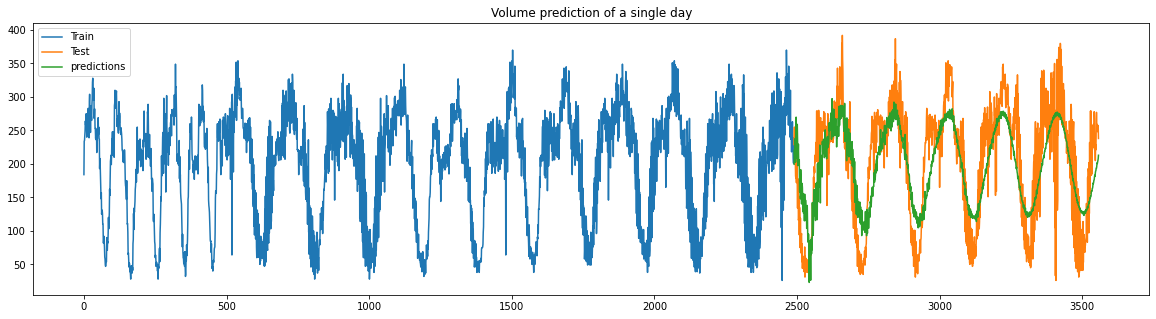

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(train_size), X_train, label='Train')
plt.plot(range(train_size, train_size+test_size, 1), X_test, label='Test')
plt.plot(range(train_size, train_size+test_size, 1), predictions, label='predictions')
plt.title('Volume prediction of a single day')
plt.legend()
plt.show()

### Find best num of lags hyperparameter

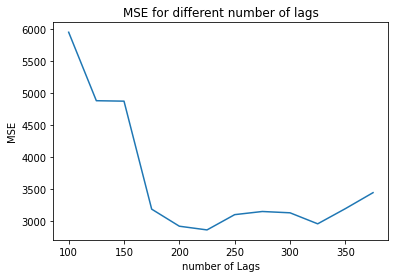

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

errors_list = []
lags_list = list(range(100, 400, 25))
for num_lags in lags_list:
  model = AutoReg(X_train, lags=num_lags)
  model_fit = model.fit()
  predictions = model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)
  errors_list.append(mean_squared_error(X_test, predictions))

plt.plot(lags_list, errors_list, label='MSE')
plt.title('MSE for different number of lags')
plt.ylabel('MSE')
plt.xlabel('number of Lags')
plt.show()

### Using the best number of lags

2860.51107272447


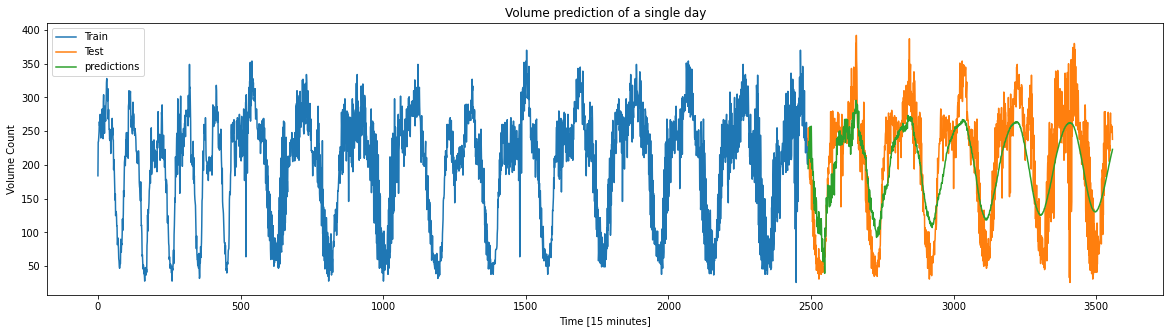

In [ ]:
model = AutoReg(X_train, lags=225)
model_fit = model.fit()
predictions = model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)

print(mean_squared_error(X_test, predictions))

plt.figure(figsize=(20,5))
plt.plot(range(train_size), X_train, label='Train')
plt.plot(range(train_size, train_size+test_size, 1), X_test, label='Test')
plt.plot(range(train_size, train_size+test_size, 1), predictions, label='predictions')
plt.title('Volume prediction of a single day')
plt.xlabel('Time [15 minutes]')
plt.ylabel('Volume Count')
plt.legend()
plt.show()

### Dynamic prediction
Assume we have the data from the traffic volume sensors in real-time. In that setup, we can update our model each time a new measurement comes in.

In [ ]:
import numpy as np

X_test_curr = X_test
X_train_curr = X_train

model_fit = model.fit()
predictions = []
while len(X_test_curr) > 0:
  model = AutoReg(X_train_curr, lags=225)
  model_fit = model.fit()
  preds = model_fit.predict(start=len(X_train_curr), end=len(X_train_curr)+len(X_test_curr)-1, dynamic=False)
  predictions.append(preds[0])
  # print(X_test[:1])
  X_train_curr = np.concatenate([X_train_curr, X_test_curr[:1]])
  print(f'Test len:{len(X_test_curr)}, Train len:{len(X_train_curr)}')
  X_test_curr = X_test_curr[1:]
  # print(len(X_test))
  # break

# print(f'train size:{len(X_train)}, test size:{len(X_test)}, pred size:{len(predictions)}, x_test_curr: {len(X_test_ref)}')

MSE: 1353.5778571484022


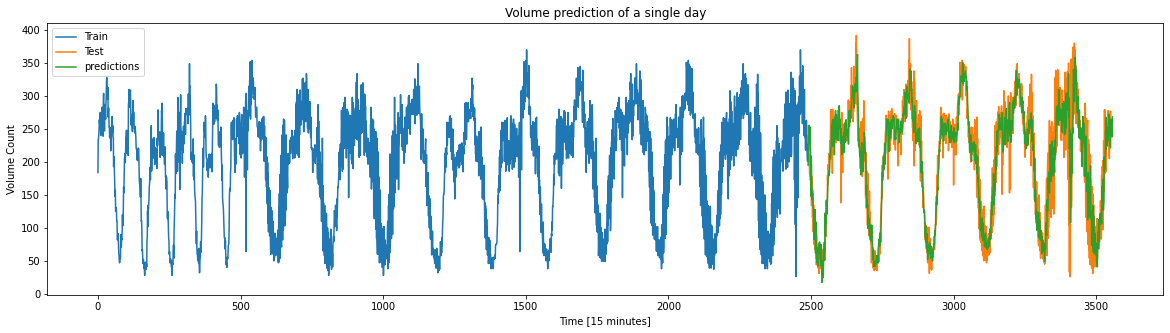

In [ ]:
# predictions
print(f'MSE: {mean_squared_error(X_test, predictions)}')

plt.figure(figsize=(20,5))
plt.plot(range(train_size), X_train, label='Train')
plt.plot(range(train_size, train_size+test_size, 1), X_test, label='Test')
plt.plot(range(train_size, train_size+test_size, 1), predictions, label='predictions')
plt.title('Volume prediction of a single day')
plt.xlabel('Time [15 minutes]')
plt.ylabel('Volume Count')
plt.legend()
plt.show()

In [ ]:
import numpy as np

X_test_curr = X_test
X_train_curr = X_train

SPAN = 12 # in [15 minutes]

model_fit = model.fit()
predictions = []
while len(X_test_curr) > 0:
  model = AutoReg(X_train_curr, lags=225)
  model_fit = model.fit()
  preds = model_fit.predict(start=len(X_train_curr), end=len(X_train_curr)+len(X_test_curr)-SPAN, dynamic=False)
  predictions.append(preds[0])
  X_train_curr = np.concatenate([X_train_curr, X_test_curr[:SPAN]])
  print(f'Test len:{len(X_test_curr)}, Train len:{len(X_train_curr)}')
  X_test_curr = X_test_curr[SPAN:]


In [ ]:
# predictions

len(X_test), len(predictions)
# print(f'MSE: {mean_squared_error(X_test, predictions)}')

# plt.figure(figsize=(20,5))
# plt.plot(range(train_size), X_train, label='Train')
# plt.plot(range(train_size, train_size+test_size, 1), X_test, label='Test')
# plt.plot(range(train_size, train_size+test_size, 1), predictions, label='predictions')
# plt.title('Volume prediction of a single day')
# plt.xlabel('Time [15 minutes]')
# plt.ylabel('Volume Count')
# plt.legend()
# plt.show()

(1068, 89)

In [ ]:
string = 'AFASFASFASFASF'

for (idx, s) in enumerate(string):
  if s == 'F':
    print(f'Index: {idx}')

Index: 1
Index: 4
Index: 7
Index: 10
Index: 13
